# Jupyter Notebook for the new __[The Cosmopolitan Globalist](https://claireberlinski.substack.com/p/introducing-the-cosmopolitan-globalist)__


#### _For making article word cloud & CG Logo - for any article, using Text_
#### _Uses Matplotlib, NumPy and WordCloud libraries._
##### _21 December 2020_

In [76]:
#If 'wordcloud' not available, install 

list_installed_lib  = !pip list 
list_installed_lib = list_installed_lib.get_nlstr()

if list_installed_lib.find('wordcloud') ==-1:
    !pip install wordcloud

In [1]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
from  copy import copy

In [2]:
file = open('levy.txt','r')

In [3]:
if '.' in file.name:
    place = file.name.rfind('.')
    folder_name = file.name[:-4]
else:
    folder_name = file.name

In [4]:
read_text = file.read()

In [5]:
file.close()

In [6]:
# Directory name in the same folder of the file
main_directory     = os.path.abspath(file.name)
main_directory_ind = os.path.abspath(file.name).rfind(file.name) 
main_directory     = os.path.abspath(file.name)[:main_directory_ind]
main_directory     = os.path.join(main_directory, file.name[:-4]+'_TheCGLogos')  
main_directory_PNG     = os.path.join(main_directory, 'PNG')  
main_directory_JPEG     = os.path.join(main_directory, 'JPEG') 
main_directory_GIF    = os.path.join(main_directory, 'GIF') 

In [7]:
if not os.path.exists(main_directory):
    os.makedirs(main_directory)

if not os.path.exists(main_directory_PNG):
    os.makedirs(main_directory_PNG)
    
if not os.path.exists(main_directory_JPEG):
    os.makedirs(main_directory_JPEG)
    
if not os.path.exists(main_directory_GIF):
    os.makedirs(main_directory_GIF)

In [273]:
read_text

'\t\t\nAround the world, liberal democracy is in retreat. The West is divided, and Caesarism is flourishing. Why?\nLaunch week concludes. Navalny pulls off an amazing caper.\nThank you for spending the week with the Cosmopolitan Globalists\n\t\nClaire Berlinski\nDec 23\t\n\t\n\t\n\nThis concludes the Cosmopolitan Globalists’ frenetic launch week. From now on, we will be publishing weekly, except on special occasions, which may happen often. If you haven’t yet subscribed, please do: Our newsroom celebrates every single subscription; indeed, we’ve invested our entire sense of self-worth in our subscription numbers.\n\nWhen I explained to Vivek that I had enabled the Substack function that alerts us to every new subscriber but disabled the feature that notifies us of cancellations, he was taken aback. “This is no way to run a business, surely?”\n\n“Of course it is,” I explained. “Remember, I’m not only the editor for the Western hemisphere but the Senior Human Resources Officer for Claire

In [19]:
#create the wordcloud object
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(read_text)

text_dictionary = wordcloud.process_text(read_text)
# sort the dictionary
word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}

#use words_ to print relative word frequencies
rel_freq=wordcloud.words_

#print results
print(list(word_freq.items())[:5])
print(list(rel_freq.items())[:5])

AttributeError: 'WordCloud' object has no attribute 'words_'

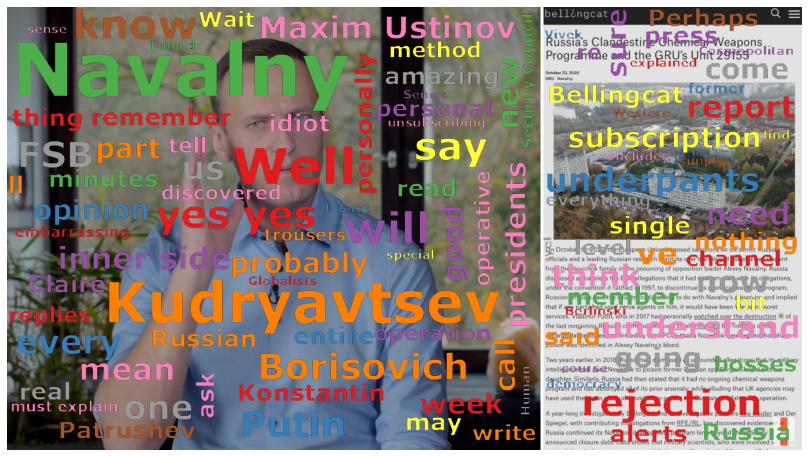

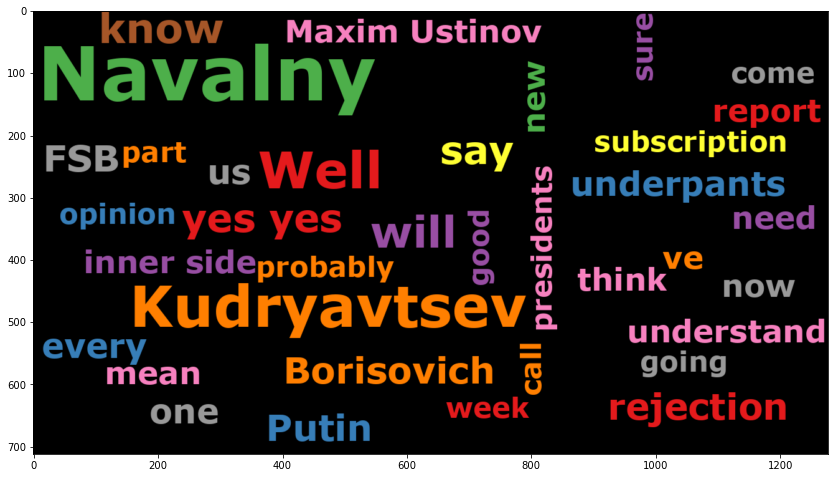

In [378]:
## COVER PAGE 
from PIL import Image 
mask = Image.open("512-SARS-CoV-2_without_background.png")#.convert('L')
imgData = np.array(mask)


wordcloud = WordCloud(background_color=None, mode="RGBA", mask = imgData, colormap = 'tab20b', 
#                       max_words=1000, 
                      min_font_size = 20,
                      max_font_size=40, 
                      random_state = 1,
                      min_word_length = 2,
                      stopwords = STOPWORDS, 
#                       font_path='LiberationMono-Regular.ttf'
                      font_path='/usr/share/fonts/TTF/Verdanab.TTF' 
                      ).generate(read_text)
wordcloud.to_file("wordcloud_out.png")
array_wordcloud = wordcloud.to_array()


mask_ = Image.open("wordcloud_out.png")#.convert('L')
imgData_ = np.array(mask_)


# indisler = np.sum(array_wordcloud[:,:,:3], axis=2)== 255*3
indisler = array_wordcloud[:,:,3] == 0
# from scipy import ndimage
# struct2 = ndimage.generate_binary_structure(2, 3)
# indisler = ndimage.binary_dilation(indisler)
# indisler = ndimage.binary_dilation(indisler)

# imgData[~indisler,:3] = 0
imgData[~indisler, 3] = 0
imgData[~indisler, :] = 0


# array_wordcloud[indisler,:] = 0

# ax.imshow(imgData, interpolation="bilinear", alpha = 1) # interpolation="bilinear",  interpolation="bilinear",
fig, ax = plt.subplots(figsize=np.float_(imgData.shape[:2])/40)# figsize=np.float_(imgData.shape[:2])/50
# ax.imshow(imgData, alpha = 1) # interpolation="bilinear", 
# ax.imshow(array_wordcloud, interpolation="bilinear") # interpolation="bilinear",
ax.imshow(imgData , interpolation="bilinear", alpha = 1)
ax.imshow(array_wordcloud , interpolation="bilinear", alpha = 1)
ax.axis('off');
plt.savefig('try.png', bbox_inches="tight",  
                    transparent=True) # quality= 100


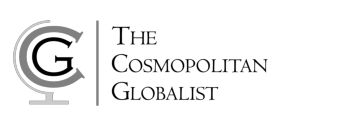

In [8]:
from PIL import Image 
mask = Image.open("CG.png")#.convert('L')
# imgData = np.asarray(mask)
imgData = np.zeros((500,1500,4), dtype = np.uint8)
imgData[:500,:1195,:] = mask
# imgData = imgData[35:-60,20:-30].copy()
plt.imshow((imgData), cmap='gray');
plt.axis('off');

In [9]:
from PIL import Image, ImageOps
og_image = Image.open("Vivek2.jpg")
gray_image = ImageOps.grayscale(og_image)
# imgData_gray = np.zeros((500,1500), dtype = np.uint8)
# imgData[:500,:1195,:] = gray_image

In [15]:
# from skimage import color
# from skimage import io

def pure_pil_alpha_to_color_v2(image, color=(255, 255, 255)):
    """Alpha composite an RGBA Image with a specified color.

    Simpler, faster version than the solutions above.

    Source: http://stackoverflow.com/a/9459208/284318

    Keyword Arguments:
    image -- PIL RGBA Image object
    color -- Tuple r, g, b (default 255, 255, 255)

    """
    image.load()  # needed for split()
    background = Image.new('RGB', image.size, color)
    background.paste(image, mask=image.split()[3])  # 3 is the alpha channel
    return background

image_ = pure_pil_alpha_to_color_v2(og_image)
image__ = np.array(image_, dtype=np.uint8)
image__ = np.asarray(np.sum(image__, axis=2), np.uint8)

NameError: name 'og_image' is not defined

In [79]:
# from skimage import io
# mask = io.imread("CG.png")
# mask.shape

In [81]:
# from skimage.color import rgb2gray
# img_gray = rgb2gray(mask)
# img_gray.shape
# plt.imshow(img_gray)
# mask_ = mask[:,:,0] + mask[:,:,1] + mask[:,:,2]
# mask_ = mask_ / mask_.max()
# plt.imshow( 255 - 10000*mask_, cmap = 'gray')
# mask_.max(), type(mask_)

In [463]:
imgData.shape

(500, 1500, 4)

In [9]:
def write_files(main_directory, file_name, stopwords, mask, show_image, 
                read_text, max_font_size=80, max_words=100, 
                background_color="white", colormap="viridis", alpha_1 = 1, alpha_2 = 1,
                third_image = None, alpha_3 = 0, random_state=1):
    
    wordcloud  = WordCloud(stopwords=STOPWORDS, random_state=random_state, max_font_size=max_font_size,mode="RGBA",
                                max_words=max_words, background_color = background_color, 
#                            font_path='Z003-MediumItalic.otf',
                           collocations=True,
                           min_word_length=3,
                                mask = mask, colormap=colormap).generate(read_text)
    # /usr/share/fonts/TTF/, /usr/share/fonts/TTF/Comic.TTF
    # '/usr/share/fonts/gsfonts/Z003-MediumItalic.otf'
    # font_path='/usr/share/fonts/TTF/Impact.TTF'
    fig, ax = plt.subplots(figsize=(6,2))
    ax.imshow(wordcloud, interpolation="bilinear", alpha = alpha_1)
    # plt.imshow(255-mask, cmap='gray')
#     fig.tight_layout()
    ax.imshow(show_image, cmap='gray', alpha = alpha_2)
    if alpha_3 > 0: #If third image is given
            ax.imshow(third_image, cmap='gray', alpha = alpha_3)
    
    ax.axis('off')
    ax.set_axis_off()
    
    dpi_list = [200, 300]
    file_format_list = ['png', 'jpeg']

    for dpi, file_format  in [(dpi,file_format) for dpi in dpi_list for file_format in file_format_list]:
        file_name_ = file_name + '_' + str(colormap) + '_dpi_' + str(dpi) + '.' + file_format
        if file_format == 'png':
            file_name_ = os.path.join(main_directory_PNG, file_name_)
        elif file_format == 'jpeg':
            file_name_ = os.path.join(main_directory_JPEG, file_name_)
            
        plt.savefig(file_name_, dpi=dpi, bbox_inches="tight", transparent=True, 
                    pad_inches = 0, format = file_format ) # quality= 100
#         pil_kwargs={'dpi':dpi,'bbox_inches':"tight", 'transparent':True, 
#                     'pad_inches' : 0, 'quality': 95}
#         plt.savefig(file_name_, pil_kwargs=pil_kwargs)

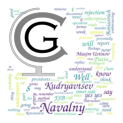

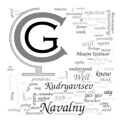

In [27]:
# Circle 
from  copy import copy
# N = 600
C = 185
nx, ny = (600, 600)
x = np.arange(0, nx)
y = np.arange(0, ny)
xv, yv = np.meshgrid(y, x)

imgData_ = np.ones((nx,ny,4), dtype=np.uint8 )*255

indisler = ((xv - 200)**2 + (yv-200)**2)>=C**2
imgData_[ indisler ] = 0

# for i in range(nx):
#     for j in range(ny):
#         if ((xv[i, j] - 200)**2 + (yv[i, j]-200)**2)<C**2:
#             imgData_[i, j] = 0

# imgData_[:, :350] = 0
imgData__ = imgData_.copy()
# imgData__[:, 350:] = 255
imgData_[:445, :385] = (imgData[55:500, 15:400])
# plt.imshow((imgData__), cmap='gray')

# wordcloud = WordCloud(stopwords=STOPWORDS, max_font_size=80, max_words=100, background_color="white", mask = imgData__, colormap="viridis").generate(read_text)
# plt.imshow(wordcloud, interpolation="bilinear", alpha = 1.0)
# # plt.imshow(255-mask, cmap='gray')
# plt.imshow((imgData_), cmap='gray', alpha = 1)

write_files(main_directory, 'circular_top_left', STOPWORDS, imgData__, imgData_, read_text, max_font_size=80, 
            max_words=100, background_color="white", colormap="viridis", alpha_1 = 1, alpha_2 = 1)
write_files(main_directory, 'circular_top_left', STOPWORDS, imgData__, imgData_, read_text, max_font_size=80, 
            max_words=100, background_color="white", colormap="gray", alpha_1 = 1, alpha_2 = 1)


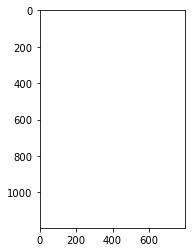

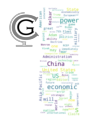

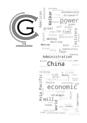

In [42]:
# UZUNLAMASINA
from  copy import copy
imgData_ = np.zeros((1195,800,4),dtype=np.uint8)
imgData_[:, :350] = 0
imgData__ = copy(imgData_)
imgData__[:, 350:] = 255
plt.imshow((imgData_), cmap='gray', alpha = 1.0)
imgData_[:500, :400] = imgData[:500, :400]

# mask_ = mask < 220

wordcloud = WordCloud(stopwords=STOPWORDS, max_font_size=80, max_words=100, background_color="white", mask = ~imgData__, colormap="viridis").generate(read_text)
# plt.figure(figsize=(15,15))
# plt.imshow( 255 - 10000*mask_, cmap = 'gray', alpha = 0.1)
# plt.imshow(wordcloud, interpolation="bilinear", alpha = 1.0)
# plt.imshow(255-mask, cmap='gray')
# plt.imshow((imgData_), cmap='gray', alpha = 1)
# plt.axis("off")
# plt.savefig('covid.png', dpi=150)
# plt.show()

write_files(main_directory, 'longitudinal',  STOPWORDS, ~imgData__, imgData_, read_text, max_font_size=80, 
            max_words=100, background_color="white", colormap="viridis", alpha_1 = 1, alpha_2 = 1)
write_files(main_directory, 'longitudinal',  STOPWORDS, ~imgData__, imgData_, read_text, max_font_size=80, 
            max_words=100, background_color="white", colormap="gray", alpha_1 = 1, alpha_2 = 1)

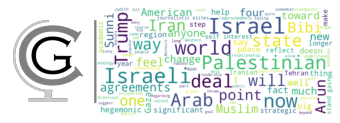

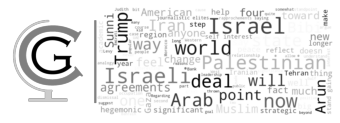

In [22]:
from  copy import copy
imgData_ = copy(imgData)
imgData_[:, 415:] = 0
imgData__ = copy(imgData_)
imgData__[:, :415] = 255
# plt.imshow((imgData_), cmap='gray', alpha = 1.0)

# mask_ = mask < 220

# wordcloud = WordCloud(stopwords=STOPWORDS, max_font_size=80, max_words=100, background_color="white", mask = imgData__, colormap="viridis").generate(read_text)
# plt.figure(figsize=(15,15))
# plt.imshow( 255 - 10000*mask_, cmap = 'gray', alpha = 0.1)
# plt.imshow(wordcloud, interpolation="bilinear", alpha = 1.0)
# # plt.imshow(255-mask, cmap='gray')
# plt.imshow((imgData_), cmap='gray', alpha = 1)
# plt.axis("off")
# plt.savefig('covid.png', dpi=150)
# plt.show()
write_files(main_directory, 'CG_leftalone',  STOPWORDS, imgData__, imgData_, read_text, max_font_size=100, 
            max_words=100, background_color="white", colormap="viridis", alpha_1 = 1, alpha_2 = 1)
write_files(main_directory, 'CG_leftalone',  STOPWORDS, imgData__, imgData_, read_text, max_font_size=100, 
            max_words=100, background_color="white", colormap="gray", alpha_1 = 1, alpha_2 = 1)

In [10]:
# PHOTO VERSION
# http://www.snapstouch.com/ColorEffect.aspx
# https://www.befunky.com/create/photo-to-cartoon/
# https://edit.cartoonize.net/image-manager
# http://www.picturetopeople.org/
# https://www.photo-kako.com/en/
    

#https://cartoon.pho.to/
# https://cartoon.pho.to/, http://share.pho.to/B8ICu

og_image = Image.open("Nighswander_o.jpeg")
vivek = np.asarray(og_image) 
vivek = vivek[::2, ::2]

imgData_ = copy(imgData)
imgData_[:, 415:] = 0
imgData__ = copy(imgData_)
imgData__[:, :415] = 255

imgData__after = zeros_image = copy(imgData)
imgData__after[:, :400] = 0

new_image = np.zeros_like( imgData, dtype = np.uint8 ) 
new_image[50:450, 10:410,:3] = vivek
new_image[50:450, 10:410,3]  = 255

write_files(main_directory, 'Photo_',  STOPWORDS, imgData__, new_image, read_text, max_font_size=100, 
            max_words=100, background_color="white", colormap="viridis", alpha_1 = 1, alpha_2 = 1, third_image = imgData_, alpha_3 = 0.4)

ValueError: could not broadcast input array from shape (270,311,3) into shape (400,400,3)

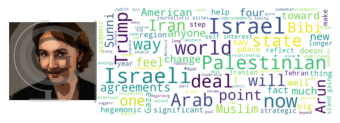

In [36]:
# PHOTO VERSION
# http://www.snapstouch.com/ColorEffect.aspx
# https://www.befunky.com/create/photo-to-cartoon/
# https://edit.cartoonize.net/image-manager
# http://www.picturetopeople.org/
# https://www.photo-kako.com/en/
    

#https://cartoon.pho.to/
# https://cartoon.pho.to/, http://share.pho.to/B8ICu

og_image = Image.open("judith_levy_ct_410.jpeg")
vivek = np.asarray(og_image) 

imgData_ = copy(imgData)
imgData_[:, 415:] = 0
imgData__ = copy(imgData_)
imgData__[:, :415] = 255

imgData__after = zeros_image = copy(imgData)
imgData__after[:, :400] = 0

new_image = np.zeros_like( imgData, dtype = np.uint8 ) 
new_image[70:427, 10:410,:3] = vivek[:,10:410]   # judith_levy_ct_410
new_image[70:427, 10:410,3]  = 255

# new_image[50:450, 10:410,:3] = vivek  # twitter
# new_image[50:450, 10:410,3]  = 255


write_files(main_directory, 'Photo_',  STOPWORDS, imgData__, new_image, read_text, max_font_size=100, 
            max_words=100, background_color="white", colormap="viridis", alpha_1 = 1, alpha_2 = 1, third_image = imgData_, alpha_3 = 0.4)

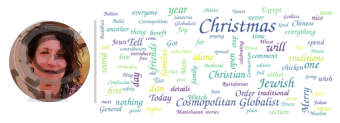

In [30]:
og_image = Image.open("Cberlinski_ct.jpeg")
vivek = np.asarray(og_image) 

imgData_ = copy(imgData)
imgData_[:, 415:] = 0
imgData__ = copy(imgData_)
imgData__[:, :415] = 255

imgData__after = zeros_image = copy(imgData)
imgData__after[:, :400] = 0

new_image = np.zeros_like( imgData, dtype = np.uint8 ) 
new_image[50:450, 10:410,:3] = vivek
new_image[50:450, 10:410,3]  = 255


C = 185
nx, ny = (500, 1500)
x = np.arange(0, nx)
y = np.arange(0, ny)
xv, yv = np.meshgrid(y, x)


indisler = ((xv - 195)**2 + (yv-250)**2)>=C**2
new_image[ indisler ] = 0



write_files(main_directory, 'Photo_circular',  STOPWORDS, imgData__, new_image, read_text, max_font_size=100, 
            max_words=100, background_color="white", colormap="viridis", alpha_1 = 1, alpha_2 = 1, third_image = imgData_, alpha_3 = 0.4)


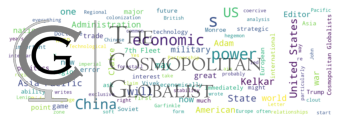

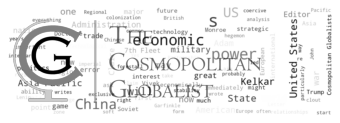

In [44]:
from  copy import copy
zeros_image = np.zeros_like(imgData)
imgData_ = copy(imgData)
imgData_[:, 385:] = 0
imgData__ = copy(imgData_)
imgData__[:, :385] = 255

imgData__after = zeros_image = copy(imgData)
imgData__after[:, :400] = 0
# plt.imshow((imgData_), cmap='gray', alpha = 1.0)

# mask_ = mask < 220

# wordcloud = WordCloud(stopwords=STOPWORDS, max_font_size=80, max_words=100, background_color="white", mask = zeros_image, colormap="viridis").generate(read_text)
# # plt.figure(figsize=(15,15))
# # plt.imshow( 255 - 10000*mask_, cmap = 'gray', alpha = 0.1)
# plt.imshow(wordcloud, interpolation="bilinear", alpha = 1.0)
# # plt.imshow(255-mask, cmap='gray')
# plt.imshow((imgData_), cmap='gray', alpha = 1)
# plt.imshow((imgData__after), cmap='gray', alpha = 0.6)
# plt.axis("off")
# plt.savefig('covid.png', dpi=150)
# plt.show()


write_files(main_directory, 'CG_watermark_type_2', STOPWORDS, zeros_image, imgData_, read_text, max_font_size=80, 
            max_words=100, background_color="white", colormap="viridis", alpha_1 = 1, alpha_2 = 1, third_image = imgData__after, alpha_3 = 0.6)
write_files(main_directory, 'CG_watermark_type_2', STOPWORDS, zeros_image, imgData_, read_text, max_font_size=80, 
            max_words=100, background_color="white", colormap="gray", alpha_1 = 1, alpha_2 = 1, third_image = imgData__after, alpha_3 = 0.6)

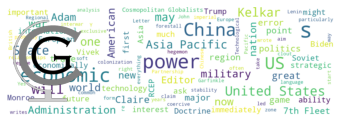

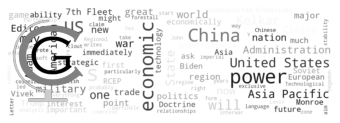

In [516]:
from  copy import copy
zeros_image = np.zeros_like(imgData)
imgData_ = copy(imgData)
imgData_[:, 385:] = 0
imgData__ = copy(imgData_)
imgData__[:, :385] = 255

# wordcloud = WordCloud(stopwords=STOPWORDS, max_font_size=80, max_words=100, background_color="white", mask = zeros_image, colormap="viridis").generate(read_text)

# plt.figure(figsize=(15,15))
# plt.imshow( 255 - 10000*mask_, cmap = 'gray', alpha = 0.1)
# plt.imshow(wordcloud, interpolation="bilinear", alpha = 1.0)
# # plt.imshow(255-mask, cmap='gray')
# plt.imshow((imgData_), cmap='gray', alpha = 1)
# # plt.imshow((imgData__after), cmap='gray', alpha = 0.4)
# plt.axis("off")
# plt.savefig('covid.jpg', dpi=150)
# plt.show()

write_files(main_directory, 'CG_only', STOPWORDS, zeros_image, imgData_, read_text, max_font_size=100, 
            max_words=100, background_color="white", colormap="viridis", alpha_1 = 1, alpha_2 = 1)
write_files(main_directory, 'CG_only', STOPWORDS, zeros_image, imgData_, read_text, max_font_size=100, 
            max_words=100, background_color="white", colormap="gray", alpha_1 = 1, alpha_2 = 1)

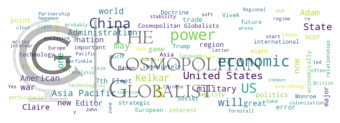

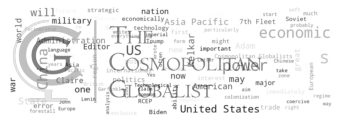

In [517]:

zeros_image = np.zeros_like(imgData)

# wordcloud = WordCloud(stopwords=STOPWORDS, max_font_size=80, max_words=100, background_color="white", mask = zeros_image, colormap="viridis").generate(read_text)
# plt.figure(figsize=(15,15))
# plt.imshow( 255 - 10000*mask_, cmap = 'gray', alpha = 0.1)
# plt.imshow(wordcloud, interpolation="bilinear", alpha = 1.0)
# # plt.imshow(255-mask, cmap='gray')
# plt.imshow((imgData), cmap='gray', alpha = .5)
# plt.axis("off")
# plt.savefig('covid.png', dpi=200)
# plt.show()

write_files(main_directory, 'CG_watermark_type_1',  STOPWORDS, zeros_image, imgData, read_text, max_font_size=80, 
            max_words=100, background_color="white", colormap="viridis", alpha_1 = 1, alpha_2 =.5)
write_files(main_directory, 'CG_watermark_type_1',  STOPWORDS, zeros_image, imgData, read_text, max_font_size=80, 
            max_words=100, background_color="white", colormap="gray", alpha_1 = 1, alpha_2 = .5)

In [112]:
# wordcloud.to_file("first_review2.png")

In [185]:
file_format = 'gif'
for i in range(0,255):
    print(i, end=' ')
    file_name_ = 'Gif' + '_' + str(i) + '.' + file_format
    file_name_ = os.path.join(main_directory_GIF, file_name_)
#     temp = np.float(temp)
    temp = image__ - np.array((i%127), dtype=np.uint8)
    temp = np.abs(temp)
    #temp = temp * np.heaviside(temp, 0)
    #mpimg.imsave(file_name_,np.asarray(temp, np.uint8))
    plt.imsave(file_name_, np.asarray(temp, np.uint8), cmap='gray')
#     img.save("file.png")
#     plt.savefig(file_name_, dpi=dpi,bbox_inches="tight", transparent=True, 
#                     pad_inches = 0) # quality= 100
    

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 

In [41]:
import glob
from PIL import Image

# filepaths
fp_in = os.path.join(main_directory_GIF, "Gif_*.gif")
fp_out = os.path.join(main_directory_GIF, "image.gif")

# https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=20, loop=0)

In [186]:
import imageio
images = []
fp_in = os.path.join(main_directory_GIF, "Gif_*.gif")
fp_out = os.path.join(main_directory_GIF, "image.gif")
for filename in sorted(glob.glob(fp_in)):
    images.append(imageio.imread(filename))
imageio.mimsave(fp_out, images)